# Final merge of datasets & exploratory analysis

Using a Python to merge the files programmatically. 

This can be useful for very large files or complex merging scenarios that are difficult to handle manually. 

**REMEMBER:** 
- 0 is Positive
- 1 is Negative
- 2 is Neutral

### Imports

In [ ]:
import transformers
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import BertTokenizer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import contractions
import emoji
from bs4 import BeautifulSoup 
import warnings 
warnings.filterwarnings("ignore", category=UserWarning) ### Disable BeautifulSoup warnings

## Display the contents of the datasets

### Apple datasets

REFERENCE: 
- https://www.kaggle.com/datasets/seriousran/appletwittersentimenttexts
- https://www.kaggle.com/datasets/suptenshi/apple-tweet-dataset
- https://www.kaggle.com/datasets/blessondensil294/twitter-product-sentiment-analysis

In [ ]:
### Define the path of all the .CSV datasets
apple_tweets_excel1 = 'datasets/apple_tweets.csv'
apple_tweets_excel2 = 'datasets/apple_tweets2.csv'
apple_tweets_excel3 = 'datasets/apple_tweets3.csv'

### Load the .CSV files into a Pandas dataframe
apple_tweets_df1 = pd.read_csv(apple_tweets_excel1)
apple_tweets_df2 = pd.read_csv(apple_tweets_excel2)
apple_tweets_df3 = pd.read_csv(apple_tweets_excel3)

### Preprocessing of Apple tweets

In [ ]:
### Remove unnecessary columns
apple_tweets_df1 = apple_tweets_df1.drop(['id'], axis=1).drop_duplicates()
apple_tweets_df2 = apple_tweets_df2.drop(['emotion_in_tweet_is_directed_at'], axis=1).drop_duplicates()
apple_tweets_df3 = apple_tweets_df3.drop_duplicates()

### Rename the column 'label' that correspond to the sentiment to simply 'sentiment'
apple_tweets_df1 = apple_tweets_df1.rename(columns={'label': 'sentiment'})
apple_tweets_df2 = apple_tweets_df2.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment', 'tweet_text': 'tweet'})
apple_tweets_df3 = apple_tweets_df3.rename(columns={'text': 'tweet'})

# Drop rows with 'conflict' in the 'sentiment' column
apple_tweets_df2 = apple_tweets_df2[apple_tweets_df2['sentiment'] != "I can't tell"]

# Convert target column to 1 for negative and 0 for positive and 2 for neutral
apple_tweets_df2['sentiment'] = apple_tweets_df2['sentiment'].replace({'Negative emotion': 1, 'Positive emotion': 0, 'No emotion toward brand or product': 2})
apple_tweets_df3['sentiment'] = apple_tweets_df3['sentiment'].replace({-1: 1, 1: 0, 0: 2})

### Change the order of columns
apple_tweets_df1 = apple_tweets_df1.reindex(columns=['tweet', 'sentiment'])

### Concatenate the dataframes 
apple_df = pd.concat([apple_tweets_df1, apple_tweets_df2, apple_tweets_df3])
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18456 entries, 0 to 1629
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      18456 non-null  object
 1   sentiment  18456 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 432.6+ KB


In [ ]:
### Count the values in the 'label' column
value_counts = apple_df['sentiment'].value_counts()

### Display the value counts
print("Value counts in column 'label':\n", value_counts)

Value counts in column 'label':
 0    9005
2    6173
1    3278
Name: sentiment, dtype: int64


In [ ]:
### Print the first 5 rows of the DataFrame
apple_df.head()

,tweet,sentiment
0,#fingerprint #Pregnancy Test https://goo.gl/h1...,0
1,Finally a transparant silicon case ^^ Thanks t...,0
2,We love this! Would you go? #talk #makememorie...,0
3,I'm wired I know I'm George I was made that wa...,0
4,What amazing service! Apple won't even talk to...,1


### Sentiment140 dataset

- REFERENCE: https://www.kaggle.com/datasets/kazanova/sentiment140 - Suren dataset

In [44]:
### Define the path of all the .CSV datasets
sentiment140_excel = 'datasets/sentiment140.csv'
sentiment140_test = 'datasets/test_data.csv'

### Load the .CSV files into a Pandas dataframe
sentiment140_df_train = pd.read_csv(sentiment140_excel, encoding = 'ISO-8859-1', names = ["sentiment", "ids", "date", "flag", "user", "text"])
sentiment140_df_test = pd.read_csv(sentiment140_test, encoding = 'ISO-8859-1', names = ["sentiment", "ids", "date", "flag", "user", "text"])

### Concatenate the dataframes
sentiment140_df = pd.concat([sentiment140_df_train, sentiment140_df_test])

### Preprocessing of Sentiment140

In [45]:
### Remove unnecessary columns
sentiment140_df = sentiment140_df.drop(['ids', 'date', 'user', 'flag'], axis=1).drop_duplicates()

### Rename the column 'text' to simply 'tweet'
sentiment140_df = sentiment140_df.rename(columns={'text': 'tweet'})

### Convert target column to 1 for negative and 0 for positive and 2 for neutral
sentiment140_df['sentiment'] = sentiment140_df['sentiment'].replace({0: 1, 4: 0})

### Change the order of columns
sentiment140_df = sentiment140_df.reindex(columns=['tweet', 'sentiment'])
sentiment140_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1584189 entries, 0 to 497
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   tweet      1584189 non-null  object
 1   sentiment  1584189 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 36.3+ MB


In [46]:
### Count the values in the 'label' column
value_counts = sentiment140_df['sentiment'].value_counts()

### Display the value counts
print("Value counts in column 'label':\n", value_counts)

Value counts in column 'label':
 0    793688
1    790362
2       139
Name: sentiment, dtype: int64


In [47]:
### Print the first 5 rows of the DataFrame
sentiment140_df.head()

,tweet,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1
1,is upset that he can't update his Facebook by ...,1
2,@Kenichan I dived many times for the ball. Man...,1
3,my whole body feels itchy and like its on fire,1
4,"@nationwideclass no, it's not behaving at all....",1


### SemEval dataset

REFERENCE: 
- https://alt.qcri.org/semeval2017/task4/index.php?id=data-and-tools - NLP competition called SemEval (Subtask A)
- https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset - semeval_13_14_14_sarc_15.csv - Suren dataset

In [48]:
### Define the path of all the .CSV datasets
semeval_excel1 = 'datasets/semeval1.csv'
semeval_excel2 = 'datasets/semeval2.csv'

### Load the .CSV files into a Pandas dataframe
semeval_df1 = pd.read_csv(semeval_excel1, encoding='ISO-8859-1')
semeval_df2 = pd.read_csv(semeval_excel2, encoding='ISO-8859-1')

### Preprocessing of SemEval

In [49]:
### Remove unnecessary columns
semeval_df2 = semeval_df2.drop(['textID', 'text'], axis=1).drop_duplicates()

### Rename the column 'label' that correspond to the sentiment to simply 'sentiment'
semeval_df2 = semeval_df2.rename(columns={'selected_text': 'tweet'})

### Convert target column to 0 for negative and 1 for positive
semeval_df2['sentiment'] = semeval_df2['sentiment'].replace({'negative': 1, 'positive': 0, 'neutral': 2})

### Concatenate the dataframes
semeval_df = pd.concat([semeval_df1, semeval_df2]).drop_duplicates()
semeval_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82442 entries, 0 to 45796
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet      82440 non-null  object 
 1   sentiment  82441 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [50]:
### Count the values in the 'label' column
value_counts = semeval_df['sentiment'].value_counts()

### Display the value counts
print("Value counts in column 'label':\n", value_counts)

Value counts in column 'label':
 2.0    33579
0.0    31503
1.0    17359
Name: sentiment, dtype: int64


In [51]:
### Print the first 5 rows of the DataFrame
semeval_df.head()

,tweet,sentiment
0,Won the match #getin . Plus\u002c tomorrow is ...,2.0
1,Some areas of New England could see the first ...,2.0
2,@francesco_con40 2nd worst QB. DEFINITELY Tony...,1.0
3,#Thailand Washington - US President Barack Oba...,2.0
4,Did y\u2019all hear what Tony Romo dressed up ...,2.0


## Perform the merge of the selected datasets

In [52]:
### Concatenate all the dataframes
final_df = pd.concat([apple_df, semeval_df, sentiment140_df]).drop_duplicates().dropna()

### Transform column 'sentiment' to integers
final_df['sentiment'] = final_df['sentiment'].astype(int)

## Little preprocessing of BERT
Before tokenizing the tweets, we will perform some slight processing on the tweets including removing mentions (eg. @apple), links and some special characters. 

The level of processing here is much less than in previous approaches because BERT was trained with the entire sentences.

## Exploratory analysis

#### Do we have class imbalance?

Due to the sentiment140 training data not including neutral tweets, we have a imbalanced dataset.

We have fewer neutral tweets compared with the other classes.

<Axes: xlabel='sentiment', ylabel='count'>

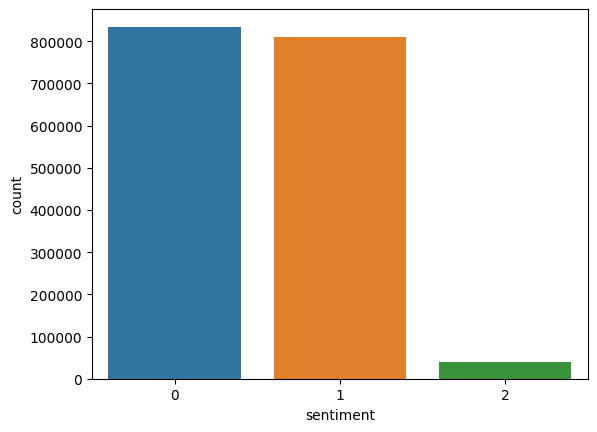

In [53]:
sns.countplot(x = 'sentiment', data = final_df)

In [54]:
### Count the values in the 'label' column
value_counts = final_df['sentiment'].value_counts()

### Display the value counts
print("Value counts in column 'label':\n", value_counts)

Value counts in column 'label':
 0    834155
1    810948
2     39891
Name: sentiment, dtype: int64


### As data preparation, we're going to check the length of each tweet:

Twitter’s character limit was 280 charcaters. 

But from the below box plot, some tweets are way more than 280 characters long.

Boxplot of tweet length: number of characters of each tweet, including letters, numbers, punctuation and spaces. 

Maximum character length: 398


<Axes: >

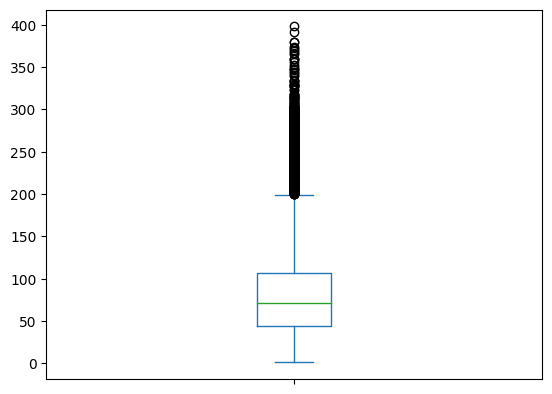

In [55]:
### Calculate tweet lengths
tweet_len = pd.Series([len(tweet) for tweet in final_df['tweet']])

### Display the maximum character length in a tweet
print("Maximum character length:", tweet_len.max())

### The distribution of tweet lengths 
tweet_len.plot(kind = 'box')

### Let's do more exploratory analysis using Word Cloud
A word cloud is a data visualization technique used to represent the most frequently occurring words or terms in a text data set. 

In a word cloud, the size of each word or term is proportional to its frequency or importance. 

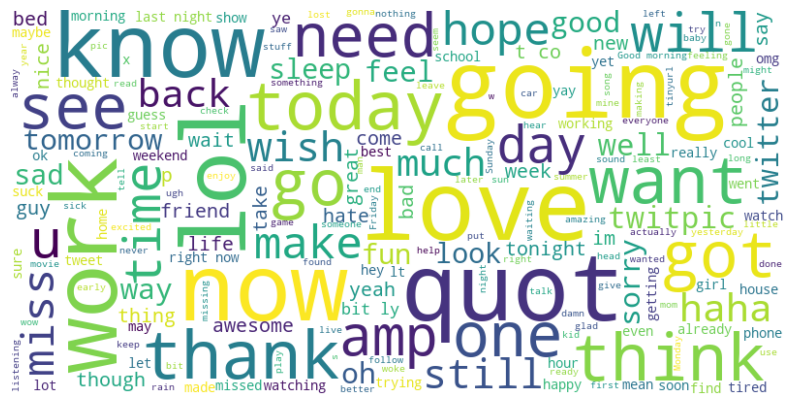

In [57]:
### Concatenate all the values in the column of interest into a single string
text = final_df['tweet'].str.cat(sep=' ')

### Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(
                width=800, 
                height=400, 
                max_font_size=100, 
                background_color='white').generate(text)

### Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## After preprocessing and doing data augmentation

In [60]:
### Read preprocessed data
final_df = pd.read_csv('datasets/final_df_preprocessed.csv')
final_df_neutrals = pd.read_csv('datasets/final_df_neutrals_preprocessed.csv')

### Concatenate the dataframes
df = pd.concat([final_df, final_df_neutrals]).drop_duplicates().dropna()


### Some exploratory analysis

In [61]:
### Count the values in the 'sentiment' column
value_counts = df['sentiment'].value_counts()

### Display the value counts
print("Value counts in column 'label':\n", value_counts)

Value counts in column 'label':
 0    804413
1    792878
2    167002
Name: sentiment, dtype: int64


### Plotting the distribution of tweet lengths (but in this case with tokens, not characters)

Maximum tweet length: 105


<Axes: >

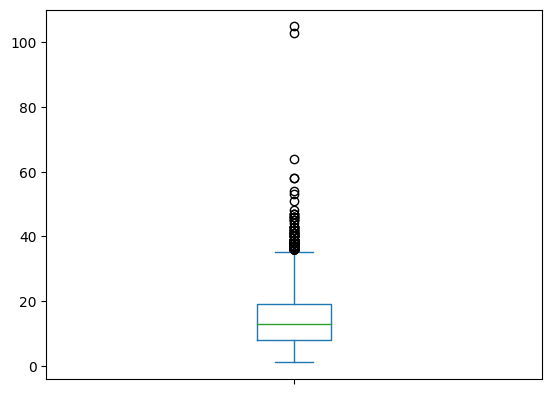

In [62]:
### Calculate tweet lengths
tweet_len = pd.Series([len(tweet.split()) for tweet in df['preprocessed_tweet']])

### Display the maximum tweet length
print("Maximum tweet length:", tweet_len.max())

### The distribution of tweet lengths
tweet_len.plot(kind = 'box')

### Choosing  a sequence length

BERT works with fixed-length sequences. We'll use a simple strategy to choose the max length. Let's store the token length of each tweet:

In [69]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [70]:
### Encode our concatenated data
encoded_tweets = [tokenizer.encode(tweet, add_special_tokens = True) for tweet in df.preprocessed_tweet]

### Find the maximum length
token_lens = [len(tweet) for tweet in encoded_tweets]
max_len = max(token_lens)
print('Max length: ', max_len)

Max length:  116


Text(0.5, 0, 'Token count')

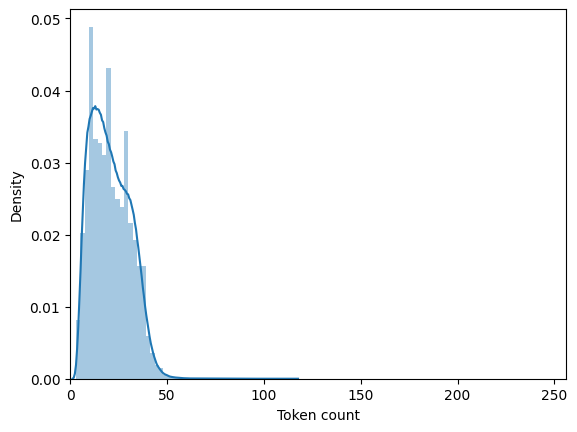

In [71]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')